# JOB 1 and JOB 2: RNN models

Vishal Malik

### Introduction

In job 1, I began by focusing on the data provided. The initial step involved examining the dataset for any missing values. The `job_id` column as irrelevant to the task at hand, so I opted to drop it from the dataset to streamline the analysis.

Next, I moved on to creating a sliding window for the data, which is a vital step for the problem at hand to create the embedding for our rnn model. This involved organizing the data into overlapping windows that could capture temporal dependencies and trends.

Once the sliding windows were established, I proceeded to distribute the data into three subsets: training, testing, and validation datasets. It allowed for proper training, evaluation, and fine-tuning while minimizing the risk of overfitting.

### JOB 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def data_pipeline(file_path, window_size=20):
    # Load the data
    df = pd.read_excel(file_path)
    
    # Drop the 'job_id' column
    df = df.drop(columns=['job_id'])
    
    # Define the features to scale
    features_to_scale = ['year', 'month', 'day', 'hour', 'minute', 'WMS0117', 'WMS0103.A3', 'WMS0104.A3', 'WMS0116.A3', 'WBS628.A3', 'DMA_Formula']
    
    # Scale the features
    scaler = StandardScaler()
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    
    # Create sliding windows
    def create_sliding_windows(data, window_size):
        X = []
        y = []
        num_rows = len(data)
        
        if num_rows <= window_size:
            raise ValueError("Data length must be greater than the window size.")
        
        for i in range(0, len(data) - window_size + 1, window_size):
            X.append(data[i:i + window_size, :-1])  
            y.append(data[i + window_size, -1])     
    
        return np.array(X), np.array(y)
    
    data = df.values
    X, y = create_sliding_windows(data, window_size)
    
    # Split sliding windows into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

#the initial data for job 1
file_path = 'YVW-data-ready.xlsx'
X_train, X_val, X_test, y_train, y_val, y_test = data_pipeline(file_path, window_size=20)


In [4]:
!pip install scikeras

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [6]:
#Defining the rnn model that uses two LSTM layers with dropout and dense layers
window_size = 20
model1 = Sequential()
model1.add(Input(shape=(window_size, X_train.shape[2])))
model1.add(LSTM(100, activation='tanh', return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(50, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(40, activation='relu'))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model1
history = model1.fit(X_train, y_train,epochs=100,batch_size=32,validation_data=(X_val, y_val),callbacks=[early_stopping],verbose=1)


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5937 - loss: 0.2302 - val_accuracy: 0.7109 - val_loss: 0.2039
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7061 - loss: 0.1887 - val_accuracy: 0.7248 - val_loss: 0.1731
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7901 - loss: 0.1454 - val_accuracy: 0.7683 - val_loss: 0.1565
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8309 - loss: 0.1218 - val_accuracy: 0.8158 - val_loss: 0.1288
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8589 - loss: 0.1017 - val_accuracy: 0.8178 - val_loss: 0.1299
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8651 - loss: 0.0976 - val_accuracy: 0.8317 - val_loss: 0.1263
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8756 - loss: 0.0893 - val_accuracy: 0.8752 - val_loss: 0.0973
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8978 - loss: 0.0780 - val_acc

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9863 - loss: 0.0112 - val_accuracy: 0.9683 - val_loss: 0.0273
Epoch 52/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9866 - loss: 0.0114 - val_accuracy: 0.9743 - val_loss: 0.0208
Epoch 53/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9854 - loss: 0.0126 - val_accuracy: 0.9624 - val_loss: 0.0316
Epoch 54/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9908 - loss: 0.0090 - val_accuracy: 0.9743 - val_loss: 0.0215
Epoch 55/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9910 - loss: 0.0086 - val_accuracy: 0.9624 - val_loss: 0.0330
Epoch 56/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9880 - loss: 0.0111 - val_accuracy: 0.9743 - val_loss: 0.0225


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9451 - loss: 0.0415 
Test Loss: 0.04600929841399193
Test Accuracy: 0.9425742626190186


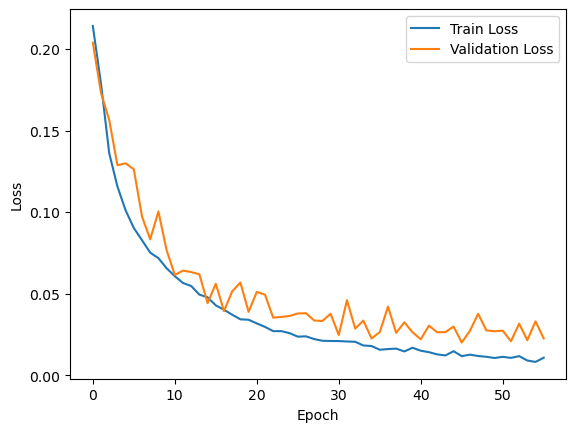

In [7]:
# Evaluating the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

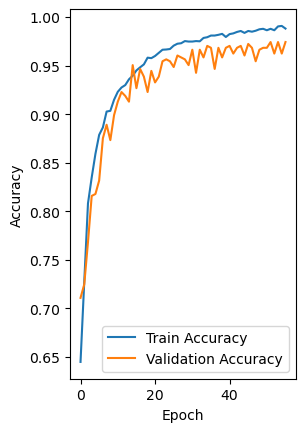

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [8]:
#Importing the highly imbalanced data to test the model

df_new = pd.read_csv('job2.csv')
#Making the data ready to apply the model1
df_new = df_new.drop(columns=['job_id','Latitude', 'Longitude'])

display(df_new.head(10))

features_to_scale1 = ['year', 'month', 'day', 'hour', 'minute', 'WMS0117', 'WMS0103.A3', 'WMS0104.A3', 'WMS0116.A3', 'WBS628.A3', 'DMA_Formula']
    
scaler1 = StandardScaler()
df_new[features_to_scale1] = scaler1.fit_transform(df_new[features_to_scale1])

#Creating sliding window for the highly imbalanced data
def create_sliding_windows_1(data, window_size):
    X = []
    y = []
    data1=data.values
    for i in range(len(data) - window_size):
        X.append(data1[i:i + window_size, :-1])  
        y.append(data1[i + window_size, -1])     
    
    return np.array(X), np.array(y)


X_new, y_new = create_sliding_windows_1(df_new, 20)


# These are the predictions that the model makes on X_new
predictions_new = model1.predict(X_new)

# Converting the probablities into integer values of 0 or 1
check_value = 0.5
predictions_01 = (predictions_new > check_value).astype(int)
y_new_binary = (y_new > check_value).astype(int)



from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_new, predictions_01, average='macro')
recall = recall_score(y_new, predictions_01, average='macro')
f1 = f1_score(y_new, predictions_01, average='macro')
conf_matrix = confusion_matrix(y_new, predictions_01)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

,year,month,day,hour,minute,WMS0117,WMS0103.A3,WMS0104.A3,WMS0116.A3,WBS628.A3,DMA_Formula,label
0,2023,4,0,16,50,89.853652,21.182875,15.539593,3.048911,12.6875,27.083878,0
1,2023,4,0,16,55,90.353450,19.371502,13.674322,3.892524,13.3125,23.625848,0
2,2023,4,0,17,0,90.383438,19.328417,13.359525,3.220116,13.6250,22.283058,0
3,2023,4,0,17,5,90.223502,19.597952,13.474276,3.220116,13.2500,23.042344,0
4,2023,4,0,17,10,90.333458,21.468199,14.117642,3.765531,13.6875,25.663872,0
5,2023,4,0,17,15,90.533377,22.209677,15.843274,4.190479,14.1250,28.118430,0
6,2023,4,0,17,20,90.923219,21.068567,14.696885,5.592975,14.3750,26.983427,0
7,2023,4,0,17,25,90.733296,19.065043,15.962997,4.124616,13.6250,25.527656,0
8,2023,4,0,17,30,89.753692,18.658842,13.318417,3.017176,13.1250,21.869435,0
9,2023,4,0,17,35,89.603753,20.081879,13.412134,4.158447,14.3125,23.339960,0


3156/3156 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
Precision: 0.4921913193614772
Recall: 0.40879726039368125
F1 Score: 0.3959176141050719
Confusion Matrix:
[[63381 35568]
 [ 1664   358]]


In [87]:
# checking the accuracy and loss on the highly imbalanced dataset
test_loss1, test_accuracy1 = model1.evaluate(X_new, y_new, verbose=1)
print(f"Test Loss: {test_loss1}")
print(f"Test Accuracy: {test_accuracy1}")

3156/3156 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6536 - loss: 0.3242
Test Loss: 0.3435682952404022
Test Accuracy: 0.6312604546546936


## JOB 2 : developing model 2


First importing the data for job 2 again which contains the location data. Then using the locations of the sensors to calculate the euclidean distances of the sensors to each leakeage location.
Then these distances will be used as labels to train the model2 for this job.

In [44]:
# Importing the new data again to calculate the distances
file_path2 = 'job2.csv'

df2 = pd.read_csv(file_path2)

df2 = df2.drop(columns=['job_id', 'label'])

df2 = df2.dropna(subset=['Latitude', 'Longitude'])

display(df2.head(10))



,year,month,day,hour,minute,WMS0117,WMS0103.A3,WMS0104.A3,WMS0116.A3,WBS628.A3,DMA_Formula,Latitude,Longitude
840,2023,4,0,14,50,91.712900,18.639154,12.325843,4.026223,12.2500,22.741220,-37.76597,145.124678
841,2023,4,0,14,55,91.143130,18.638672,12.135447,3.855910,12.3125,22.317529,-37.76597,145.124678
842,2023,4,0,15,0,91.293070,17.906879,12.752417,4.207902,12.1875,22.679698,-37.76597,145.124678
843,2023,4,0,15,5,91.443009,18.212448,12.525876,4.207902,12.8750,22.071226,-37.76597,145.124678
844,2023,4,0,15,10,91.712900,20.468033,12.276958,3.878753,12.7500,23.873744,-37.76597,145.124678
845,2023,4,0,15,15,90.863243,19.154053,12.847651,3.725782,12.3750,23.352487,-37.76597,145.124678
846,2023,4,0,15,20,91.223098,18.821342,13.905648,3.796920,12.2500,24.273911,-37.76597,145.124678
847,2023,4,0,15,25,91.572956,18.314035,14.244421,3.865136,12.3125,24.111092,-37.76597,145.124678
848,2023,4,0,15,30,90.613345,19.094852,12.803322,2.990983,12.1250,22.764157,-37.76597,145.124678
849,2023,4,0,15,35,91.193110,19.471128,12.438808,4.224282,12.1250,24.009219,-37.76597,145.124678


In [45]:
sensor_locations = {
    'WMS0117': (37.758, 145.135),
    'WMS0103': (37.768, 145.131),
    'WMS0104': (37.767, 145.119),
    'WMS0116': (37.767, 145.141),
    'WBS628': (37.758, 145.118)
}

# Calculating Euclidean distances
def calculate_distance(row, sensor_location):
    return np.sqrt((row['Latitude'] - sensor_location[0])**2 + (row['Longitude'] - sensor_location[1])**2)

for sensor, location in sensor_locations.items():
    df2[sensor + '_distance'] = df2.apply(lambda row: calculate_distance(row, location), axis=1)

In [46]:
# data after calculating the distance and creating new labels for it
df2.head(5)

,year,month,day,hour,minute,WMS0117,WMS0103.A3,WMS0104.A3,WMS0116.A3,WBS628.A3,DMA_Formula,Latitude,Longitude,WMS0117_distance,WMS0103_distance,WMS0104_distance,WMS0116_distance,WBS628_distance
840,2023,4,0,14,50,91.712900,18.639154,12.325843,4.026223,12.2500,22.741220,-37.76597,145.124678,75.523971,75.53397,75.53297,75.532972,75.52397
841,2023,4,0,14,55,91.143130,18.638672,12.135447,3.855910,12.3125,22.317529,-37.76597,145.124678,75.523971,75.53397,75.53297,75.532972,75.52397
842,2023,4,0,15,0,91.293070,17.906879,12.752417,4.207902,12.1875,22.679698,-37.76597,145.124678,75.523971,75.53397,75.53297,75.532972,75.52397
843,2023,4,0,15,5,91.443009,18.212448,12.525876,4.207902,12.8750,22.071226,-37.76597,145.124678,75.523971,75.53397,75.53297,75.532972,75.52397
844,2023,4,0,15,10,91.712900,20.468033,12.276958,3.878753,12.7500,23.873744,-37.76597,145.124678,75.523971,75.53397,75.53297,75.532972,75.52397


In [47]:
#dropping the latitude and longitude columns
df2 = df2.drop(columns = ['Latitude','Longitude'])

In [49]:
# here we are preparing the data and the windows for the model2
# the features are scaled for the input
window_size1 = 20

features_to_scale33 = ['year', 'month', 'day', 'hour', 'minute', 'WMS0117', 'WMS0103.A3', 'WMS0104.A3', 'WMS0116.A3', 'WBS628.A3', 'DMA_Formula']
    
scaler33 = StandardScaler()
df2[features_to_scale33] = scaler33.fit_transform(df2[features_to_scale33])


s_columns = df2.columns[:11] 
d_columns = df2.columns[11:]  

def create_sliding_windows1(data, window_size, s_columns, d_columns):
    sensor_data = data[s_columns].values
    distance_data = data[d_columns].values
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(sensor_data[i:i+window_size])
        y.append(distance_data[i+window_size])
    return np.array(X), np.array(y)

X_t2, y_t2 = create_sliding_windows1(df2, window_size1, s_columns, d_columns)

#splitting into train, test and validation
X_train_t2, X_temp_t2, y_train_t2, y_temp_t2 = train_test_split(X_t2, y_t2, test_size=0.2, random_state=42)
X_val2, X_test_t2, y_val2, y_test_t2 = train_test_split(X_temp_t2, y_temp_t2, test_size=0.5, random_state=42)
    


In [108]:
# creating the model for the job 2, that takes in input shape of (None, 20, 11) and output are predicted distances to the sensor
model2 = Sequential()
model2.add(LSTM(64, input_shape=(window_size, len(s_columns)), return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(32, return_sequences=False))
model2.add(Dense(5))
model2.compile(optimizer='adam', loss='mse')

model2.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 20, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,037 (125.14 KB)

 Trainable params: 32,037 (125.14 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history2 = model2.fit(X_train_t2, y_train_t2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[early_stopping1])

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5607.9121 - val_loss: 5117.4751
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5019.8032 - val_loss: 4778.4336
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4710.8975 - val_loss: 4515.0151
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4454.3545 - val_loss: 4275.6943
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4219.1338 - val_loss: 4051.9678
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3998.6064 - val_loss: 3840.4453
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3789.7490 - val_loss: 3639.3652
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3591.0107 - val_loss: 3447.6396
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3401.5027 - val_loss: 3264.5222
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3220.3796 - val_loss: 3089.4607
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3047.2341 - val_loss: 2922.0

Epoch 67/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9157 - val_loss: 11.3115
Epoch 68/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8273 - val_loss: 9.4497
Epoch 69/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0357 - val_loss: 7.8570
Epoch 70/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5037 - val_loss: 6.5010
Epoch 71/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2009 - val_loss: 5.3522
Epoch 72/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0993 - val_loss: 4.3836
Epoch 73/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1712 - val_loss: 3.5714
Epoch 74/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3937 - val_loss: 2.8938
Epoch 75/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7462 - val_loss: 2.3318
Epoch 76/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2100 - val_loss: 1.8680
Epoch 77/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7676 - val_loss: 1.4878
Epoch 78/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [110]:
# Predicting distances on training data
train_predictions2 = model2.predict(X_train_t2)

# Calculating the prediction errors
train_errors = train_predictions2 - y_train_t2

# Calculate the variance of the prediction errors
variance = np.var(train_errors, axis=0)

print(f'Variance of the prediction errors: {variance}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Variance of the prediction errors: [3.37236098e-05 3.37182053e-05 3.36972684e-05 3.37166264e-05
 3.37126887e-05]


In [111]:
# Evaluating the model2 on the test set
test_predictions11 = model2.predict(X_test_t2)

# Checking for the MAE and MSE loss
test_mae = np.mean(np.abs(test_predictions11 - y_test_t2), axis=0)
test_mse = np.mean((test_predictions11 - y_test_t2)**2, axis=0)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test MAE: [0.03559149 0.03396473 0.02464071 0.02911571 0.03523925]
Test MSE: [0.00130093 0.00118777 0.00064132 0.0008819  0.00127597]


In [112]:
# Comparing a few examples of predicted values and true values on the test set
print("\nComparison of Predicted and True Values on Test Set:")
for i in range(5): 
    print(f'Example {i + 1}:')
    print(f'Predicted: {test_predictions11[i]}')
    print(f'True: {y_test_t2[i]}')
    print()



Comparison of Predicted and True Values on Test Set:
Example 1:
Predicted: [75.48153 75.49316 75.50148 75.49701 75.48188]
True: [75.52397076 75.53397031 75.53297026 75.53297181 75.52397035]

Example 2:
Predicted: [75.48153 75.49316 75.50148 75.49701 75.48188]
True: [75.51408029 75.5240799  75.52307999 75.52308128 75.51408008]

Example 3:
Predicted: [75.48153  75.49316  75.501465 75.497    75.48188 ]
True: [75.5101314  75.52013125 75.51913205 75.51913204 75.5101322 ]

Example 4:
Predicted: [75.48153 75.49316 75.50148 75.49701 75.48188]
True: [75.52397076 75.53397031 75.53297026 75.53297181 75.52397035]

Example 5:
Predicted: [75.48153 75.49316 75.50148 75.49701 75.48188]
True: [75.52397076 75.53397031 75.53297026 75.53297181 75.52397035]



In [113]:
# The predictions of the model on the training data
train_predictions2

array([[75.48153 , 75.49316 , 75.50148 , 75.497   , 75.48188 ],
       [75.48153 , 75.49315 , 75.50148 , 75.49701 , 75.48188 ],
       [75.48153 , 75.49316 , 75.50148 , 75.49701 , 75.48188 ],
       ...,
       [75.48152 , 75.49316 , 75.50148 , 75.497   , 75.48188 ],
       [75.48152 , 75.49315 , 75.50148 , 75.497   , 75.48188 ],
       [75.48151 , 75.49316 , 75.50148 , 75.496994, 75.48189 ]],
      dtype=float32)

In [114]:
# Predict leakages with job 1 model= model1 on the test set for job 2

leakage_predictions = model1.predict(X_test_t2)

# Predict distances with Task 2 model for detected leakages
for i, prediction in enumerate(leakage_predictions):
    if prediction > 0.5:  # Threshold for leakage detection
        distances = model2.predict(np.expand_dims(X_test_t2[i], axis=0))
        print(f'Leakage detected at index {i}. Predicted distances: {distances}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 2. Predicted distances: [[75.48151  75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Leakage detected at index 5. Predicted distances: [[75.481514 75.49315  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 10. Predicted distances: [[75.48151  75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 19. Predicted distances: [[75.481514 75.49316  75.50148  75.497    75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 24. Predicted distances: [[75.481514 75.49315  75.50148  75.497    75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 28. Predicted distances: [[75.481514 75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Leakage detected at index 29. Predicted distances: [[75.481514 75.49

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Leakage detected at index 155. Predicted distances: [[75.481514 75.49316  75.50148  75.497    75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 159. Predicted distances: [[75.481514 75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 165. Predicted distances: [[75.48151  75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Leakage detected at index 167. Predicted distances: [[75.48151  75.49315  75.501465 75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 176. Predicted distances: [[75.48151  75.49316  75.50148  75.496994 75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Leakage detected at index 177. Predicted distances: [[75.481514 75.49316  75.50148  75.497    75.48189 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Leakage detected at index 180. Predicted distances: [[75.481514 75.49315  75.50148  75.497    75.4

In [115]:
# creating a function that will predict the leakages on the input data, then if leakage is found will predict the distances
#from the sensor and then will present a interval taking into account the variance of the model.

def predict_and_calculate_range(model1, model2, X_data, threshold=0.5, variances=None):
    """
    Args:
        model1: The first model used to predict leakage.
        model2: The second model used to predict distances for detected leakages.
        X_data: The input data to predict on.
        threshold: The threshold for leakage detection.
        variances: The variances of the prediction errors for the distances.
    """
    if variances is None:
        raise ValueError("Variance values must be provided.")
    
    # Ensure variances length matches the number of distances
    if len(variances) != 5:
        raise ValueError("The variances array must contain 5 elements corresponding to the 5 distances.")

    # Predict leakages using the first model
    leakage_predictions = model1.predict(X_data)

    # Predict distances for detected leakages and calculate range
    for i, prediction in enumerate(leakage_predictions):
        if prediction > threshold:  # Threshold for leakage detection
            distances = model2.predict(np.expand_dims(X_data[i], axis=0)).flatten()
            print(f'Leakage detected at index {i}.')
            
            # Calculate and display the range based on variance
            for j, distance in enumerate(distances):
                mean = distance
                variance = variances[j]
                std_dev = np.sqrt(variance)
                
                lower_bound = mean - 1.96 * std_dev  # 95% confidence interval lower bound
                upper_bound = mean + 1.96 * std_dev  # 95% confidence interval upper bound
                
                print(f'  Sensor {j + 1}: Mean Distance = {mean:.4f}, Variance = {variance:.8f}')
                print(f'  95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]')
            print("-" * 50)





In [116]:
# Calling the function to predict and calculate a range of leakage location.
predict_and_calculate_range(model1, model2, X_test_t2, threshold=0.5, variances=variance)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 2.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4932, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence Interval: [75.4901, 75.5129]
  Sensor 4: Mean Distance = 75.4970, Variance = 0.00003372
  95% Confidence Interval: [75.4856, 75.5084]
  Sensor 5: Mean Distance = 75.4819, Variance = 0.00003371
  95% Confidence Interval: [75.4705, 75.4933]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Leakage detected at index 5.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Varia

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 44.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence Interval: [75.4901, 75.5129]
  Sensor 4: Mean Distance = 75.4970, Variance = 0.00003372
  95% Confidence Interval: [75.4856, 75.5084]
  Sensor 5: Mean Distance = 75.4819, Variance = 0.00003371
  95% Confidence Interval: [75.4705, 75.4933]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 46.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4932, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence In

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Leakage detected at index 104.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4932, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence Interval: [75.4901, 75.5128]
  Sensor 4: Mean Distance = 75.4970, Variance = 0.00003372
  95% Confidence Interval: [75.4856, 75.5084]
  Sensor 5: Mean Distance = 75.4819, Variance = 0.00003371
  95% Confidence Interval: [75.4705, 75.4933]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 105.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 126.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence Interval: [75.4901, 75.5129]
  Sensor 4: Mean Distance = 75.4970, Variance = 0.00003372
  95% Confidence Interval: [75.4856, 75.5084]
  Sensor 5: Mean Distance = 75.4819, Variance = 0.00003371
  95% Confidence Interval: [75.4705, 75.4933]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Leakage detected at index 127.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Leakage detected at index 165.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4932, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence Interval: [75.4901, 75.5129]
  Sensor 4: Mean Distance = 75.4970, Variance = 0.00003372
  95% Confidence Interval: [75.4856, 75.5084]
  Sensor 5: Mean Distance = 75.4819, Variance = 0.00003371
  95% Confidence Interval: [75.4705, 75.4933]
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Leakage detected at index 167.
  Sensor 1: Mean Distance = 75.4815, Variance = 0.00003372
  95% Confidence Interval: [75.4701, 75.4929]
  Sensor 2: Mean Distance = 75.4931, Variance = 0.00003372
  95% Confidence Interval: [75.4818, 75.5045]
  Sensor 3: Mean Distance = 75.5015, Variance = 0.00003370
  95% Confidence 